In [1]:
# import the dependencies
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [4]:
# use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

65.22016940342752 -125.59482103232334
-38.72871048052651 174.81893289095217
9.571387887352714 -149.1111725047507
60.28530422815521 90.51886485794716
88.20563365253014 -174.54016671082434
-30.027673037994646 -134.31545477470704
30.886390723769622 -122.21907622891946
73.22003176173752 25.606074892068676
71.5369992679122 -81.36571766667771
55.27391517246767 -84.15723506706398
-84.77793954901593 36.010466515871684
39.7814817014403 -171.11284009104222
79.76023636403698 146.4679199940519
7.963681352494788 40.14709231869756
32.56332032777233 94.22648277761203
-65.16010609022666 120.6227264820443
70.3242250272393 69.75257187335083
12.618861699690257 -50.53885518895808
-36.530651289052535 -38.78927616210905
43.25320451235004 -179.0159337166111
-79.00647987350226 -3.650323618471674
41.981873016203906 109.8631726831153
-4.813239216455443 -153.38767366233319
-53.33948450601278 127.94245586540302
55.521889918454605 35.5019301891443
29.893377660783003 -63.97377996776625
41.508960180010035 -17.636968

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b399f39bba312545a513d94a6c4294df


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | norman wells
Processing Record 2 of Set 1 | piopio
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | teya
Processing Record 5 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | lompoc
Processing Record 8 of Set 1 | honningsvag
Processing Record 9 of Set 1 | clyde river
Processing Record 10 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | robe
Processing Record 15 of Set 1 | lasa
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | yar-sale
Processing Record 18 of Set 1 | iracoubo
Processing Record 19 of Set 1 | laguna
Processing Record 20 of Set 1 | provideniya
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | 

City not found. Skipping...
Processing Record 40 of Set 4 | mahebourg
Processing Record 41 of Set 4 | kamwenge
Processing Record 42 of Set 4 | hambantota
Processing Record 43 of Set 4 | viseu
Processing Record 44 of Set 4 | rio verde de mato grosso
Processing Record 45 of Set 4 | lucapa
Processing Record 46 of Set 4 | new norfolk
Processing Record 47 of Set 4 | kouroussa
Processing Record 48 of Set 4 | fermoy
Processing Record 49 of Set 4 | samusu
City not found. Skipping...
Processing Record 50 of Set 4 | eureka
Processing Record 1 of Set 5 | vaini
Processing Record 2 of Set 5 | cayenne
Processing Record 3 of Set 5 | thompson
Processing Record 4 of Set 5 | arlit
Processing Record 5 of Set 5 | sundsvall
Processing Record 6 of Set 5 | celestun
Processing Record 7 of Set 5 | west bay
Processing Record 8 of Set 5 | talcahuano
Processing Record 9 of Set 5 | sawakin
Processing Record 10 of Set 5 | nelson
Processing Record 11 of Set 5 | salalah
Processing Record 12 of Set 5 | lukulu
Processi

City not found. Skipping...
Processing Record 31 of Set 8 | djambala
Processing Record 32 of Set 8 | chauk
Processing Record 33 of Set 8 | poum
Processing Record 34 of Set 8 | sterling
Processing Record 35 of Set 8 | bousse
Processing Record 36 of Set 8 | ilo
Processing Record 37 of Set 8 | moshenskoye
Processing Record 38 of Set 8 | valkeala
Processing Record 39 of Set 8 | ocotal
Processing Record 40 of Set 8 | the valley
Processing Record 41 of Set 8 | porvoo
Processing Record 42 of Set 8 | pastavy
Processing Record 43 of Set 8 | mantua
Processing Record 44 of Set 8 | kumphawapi
Processing Record 45 of Set 8 | binga
Processing Record 46 of Set 8 | camana
Processing Record 47 of Set 8 | brigantine
Processing Record 48 of Set 8 | inongo
Processing Record 49 of Set 8 | lumut
Processing Record 50 of Set 8 | barstow
Processing Record 1 of Set 9 | biak
Processing Record 2 of Set 9 | huambo
Processing Record 3 of Set 9 | springhill
Processing Record 4 of Set 9 | polovinnoye
Processing Recor

Processing Record 22 of Set 12 | avera
Processing Record 23 of Set 12 | havre-saint-pierre
Processing Record 24 of Set 12 | coihaique
Processing Record 25 of Set 12 | valparaiso
Processing Record 26 of Set 12 | nanga eboko
Processing Record 27 of Set 12 | sarkand
Processing Record 28 of Set 12 | asyut
Processing Record 29 of Set 12 | deputatskiy
Processing Record 30 of Set 12 | kamaishi
Processing Record 31 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 32 of Set 12 | tocopilla
Processing Record 33 of Set 12 | altagracia de orituco
Processing Record 34 of Set 12 | novyy urengoy
Processing Record 35 of Set 12 | adamas
Processing Record 36 of Set 12 | maniitsoq
Processing Record 37 of Set 12 | sobolevo
Processing Record 38 of Set 12 | tura
Processing Record 39 of Set 12 | prieska
Processing Record 40 of Set 12 | luang prabang
Processing Record 41 of Set 12 | totness
Processing Record 42 of Set 12 | urusha
Processing Record 43 of Set 12 | saratovskaya
Processing Reco

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Norman Wells,65.2820,-126.8329,33.39,92,100,30.49,CA,2022-10-10 16:14:13
1,Piopio,-38.4667,175.0167,46.11,93,99,1.92,NZ,2022-10-10 16:14:14
2,Hilo,19.7297,-155.0900,80.28,78,0,5.75,US,2022-10-10 16:14:14
3,Teya,60.3778,92.6267,41.43,94,100,7.92,RU,2022-10-10 16:14:15
4,Rikitea,-23.1203,-134.9692,71.47,71,1,8.21,PF,2022-10-10 16:14:16
5,Lompoc,34.6391,-120.4579,59.52,93,100,4.61,US,2022-10-10 16:14:16
6,Honningsvag,70.9821,25.9704,44.35,76,100,9.22,NO,2022-10-10 16:14:17
7,Clyde River,70.4692,-68.5914,18.45,82,100,5.44,CA,2022-10-10 16:14:17
8,Port Elizabeth,-33.9180,25.5701,72.10,86,0,20.71,ZA,2022-10-10 16:14:18
9,Kapaa,22.0752,-159.3190,69.78,94,0,6.91,US,2022-10-10 16:14:19


In [16]:
# reorganize the data from columns for city_data_df
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [17]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Norman Wells,CA,2022-10-10 16:14:13,65.2820,-126.8329,33.39,92,100,30.49
1,Piopio,NZ,2022-10-10 16:14:14,-38.4667,175.0167,46.11,93,99,1.92
2,Hilo,US,2022-10-10 16:14:14,19.7297,-155.0900,80.28,78,0,5.75
3,Teya,RU,2022-10-10 16:14:15,60.3778,92.6267,41.43,94,100,7.92
4,Rikitea,PF,2022-10-10 16:14:16,-23.1203,-134.9692,71.47,71,1,8.21
5,Lompoc,US,2022-10-10 16:14:16,34.6391,-120.4579,59.52,93,100,4.61
6,Honningsvag,NO,2022-10-10 16:14:17,70.9821,25.9704,44.35,76,100,9.22
7,Clyde River,CA,2022-10-10 16:14:17,70.4692,-68.5914,18.45,82,100,5.44
8,Port Elizabeth,ZA,2022-10-10 16:14:18,-33.9180,25.5701,72.10,86,0,20.71
9,Kapaa,US,2022-10-10 16:14:19,22.0752,-159.3190,69.78,94,0,6.91


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1665422551.286372

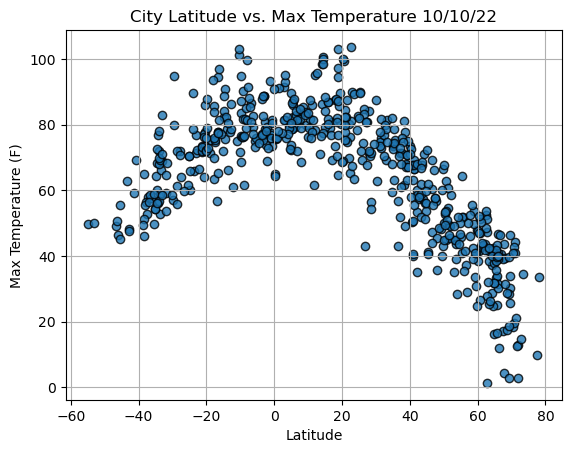

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

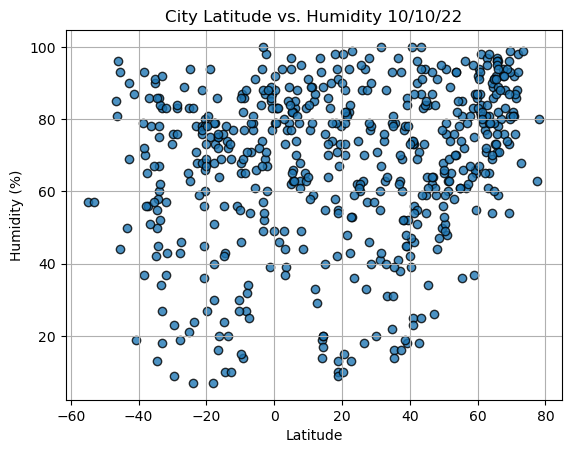

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

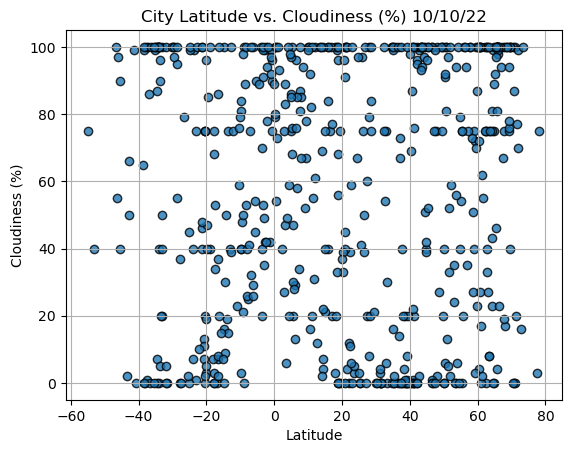

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

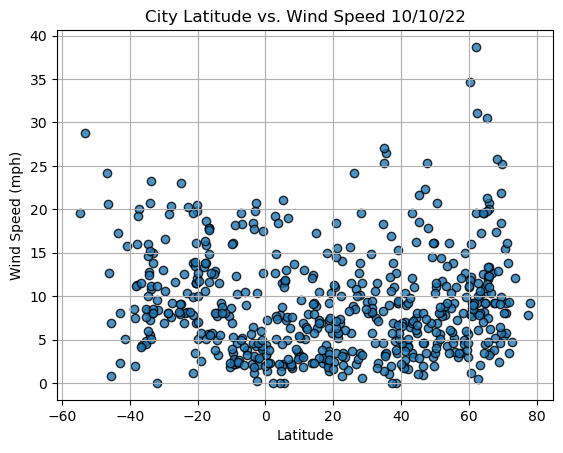

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()